## student details:

## Rishi Sankhla - 33724434 (Team leader)
## Antony Sebastian - 33771256

In [307]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [308]:
# extracting data set and building a dataframe out of it
df_test = pd.read_csv('sonar_test.csv')
df_train = pd.read_csv('sonar_train.csv')

In [309]:
# displaying train dataframe
df_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,M
135,0.0516,0.0944,0.0622,0.0415,0.0995,0.2431,0.1777,0.2018,0.2611,0.1294,...,0.0432,0.0274,0.0152,0.0120,0.0129,0.0020,0.0109,0.0074,0.0078,M
136,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M
137,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M


In [310]:
#displaying test data frame
df_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
1,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
2,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
3,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
4,0.0216,0.0124,0.0174,0.0152,0.0608,0.1026,0.1139,0.0877,0.1160,0.0866,...,0.0052,0.0049,0.0096,0.0134,0.0122,0.0047,0.0018,0.0006,0.0023,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M
65,0.0117,0.0069,0.0279,0.0583,0.0915,0.1267,0.1577,0.1927,0.2361,0.2169,...,0.0053,0.0029,0.0020,0.0013,0.0029,0.0020,0.0062,0.0026,0.0052,M
66,0.0308,0.0339,0.0202,0.0889,0.1570,0.1750,0.0920,0.1353,0.1593,0.2795,...,0.0167,0.0127,0.0138,0.0090,0.0051,0.0029,0.0122,0.0056,0.0020,R
67,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208,M


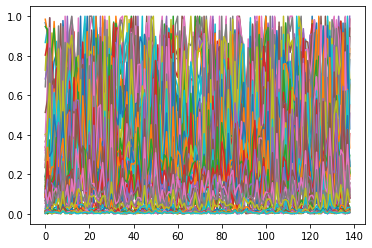

In [311]:
# showing the graph of train dataset before scaling
df1_train=df_train.iloc[:,:60] 
plt.plot(df1_train)
plt.show()

In [312]:
# creating an object of standardscaler to scale down the training set
scaler = StandardScaler()
scaler.fit(df1_train) 
scaled_features = scaler.transform(df1_train)

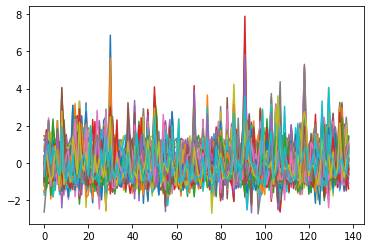

In [313]:
# showing the graph of train dataset after scaling
plt.plot(scaled_features)
plt.show()

In [314]:
#building a dataframe from scaled_features
df1_train = pd.DataFrame(scaled_features,columns=df1_train.columns)
df1_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
0,-0.931655,-0.873143,-0.942881,-0.584060,-0.730069,-0.875809,-1.157731,-0.422622,-0.618921,-0.643863,...,0.075882,0.416295,0.359267,-0.246233,0.042907,-1.017630,-0.329357,-0.335925,-0.327409,-0.730954
1,1.377356,0.306475,0.211550,-0.295133,0.488401,-0.481347,-0.628256,-1.006139,-0.548077,-1.347051,...,-1.117874,-1.179373,-1.373020,1.786005,1.604241,0.006417,0.748270,0.490249,0.559038,0.753251
2,-0.869489,-0.316777,-0.520719,-0.396363,-0.799747,0.212001,0.344349,-0.788034,-0.843120,-0.548945,...,1.179698,0.768713,-0.151899,-0.714086,-0.125886,0.188102,-0.124979,0.519756,-0.310684,0.971517
3,-0.611945,-0.161724,0.474750,1.103106,0.733167,1.188597,0.717426,-0.238775,-0.718936,-0.671548,...,-0.643643,-0.709483,-1.231029,-0.304715,0.464889,-0.439539,-1.221186,-0.911297,-0.929525,-0.076157
4,0.125162,1.771877,2.356238,1.858113,1.646126,1.146892,-0.827013,0.083245,0.276209,1.154050,...,0.247586,0.661029,2.077355,0.382445,-0.350943,0.947879,0.283776,0.918090,-0.712094,0.818731


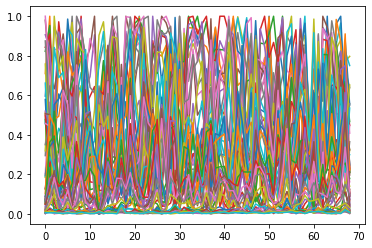

In [315]:
# showing the graph of test dataset before scaling
df1_test=df_test.iloc[:,:60] 
plt.plot(df1_test)
plt.show()

In [316]:
# creating an object of standardscaler to scale down the testing set
scaler = StandardScaler()
scaler.fit(df1_test) 
scaled_features = scaler.transform(df1_test)

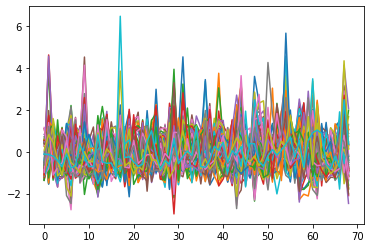

In [317]:
# showing the graph of test dataset after scaling
plt.plot(scaled_features)
plt.show()

In [318]:
#building a dataframe for test dataset from scaled_features
df1_test = pd.DataFrame(scaled_features,columns=df1_test.columns)
df1_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
0,-0.725932,-0.778415,-0.695802,-0.877307,-0.716196,-0.552666,-0.487322,-0.974276,-0.513400,-0.565682,...,-1.170111,-1.146335,-0.635384,-1.104195,-0.556127,-0.753376,-0.991077,-0.625901,0.075076,-0.107450
1,0.980079,1.460292,3.999401,4.614084,4.557686,1.960754,-0.900653,1.134394,-0.778300,-0.944968,...,1.282857,1.311827,1.171470,1.724560,-0.097260,1.318700,1.387239,1.204064,0.810733,-0.141934
2,0.297674,-0.390535,-0.999315,0.006651,0.015110,-0.580215,-0.330708,0.107190,0.286561,0.272527,...,-0.013712,-0.371348,-1.358126,-1.253733,-0.455750,0.131783,-1.114626,0.158370,0.442904,-0.210902
3,-0.561650,-0.714277,-0.355341,-1.114687,-1.038561,-0.593179,-0.191854,-0.872061,-0.767774,-1.274988,...,-0.302812,-0.552986,1.518386,0.752565,-0.068581,-0.351031,-0.759423,-0.730470,-0.384709,-0.417805
4,-0.342606,-0.863932,-0.811929,-0.929304,-0.263044,-0.017896,-0.057844,-0.644915,-0.594098,-0.859933,...,-1.178872,-1.013134,-0.996755,-0.281738,0.648399,0.735300,-0.527769,-1.026750,-1.151018,-0.710919


In [319]:
# merging the class column back to our dataframes 
df_test = pd.concat([df1_test, df_test['Class']], axis=1)
df_train = pd.concat([df1_train, df_train['Class']], axis=1)

In [320]:
#function to convert dataframe to list
def convert_list(df):
    full_data=[]
    for i in df.iterrows():
        each_row=[]
        for p in range(0,61):
            if i[1][p] != 'R' and i[1][p] != 'M': 
                each_row.append(i[1][p])
        full_data.append(each_row)
    return full_data


In [321]:
#function to calculate distance for each row
def cal_dis(l1,l2,q):
    total=0
    for i in range(0,len(l1)):
        total=total+((abs(l1[i]-l2[i]))**q)
    a=total**(1/q)
    return a

In [322]:
#function to calculate distance for the whole dataframe
def min_each_row(df_train,df_test,q):
    df1=convert_list(df_train)
    df2=convert_list(df_test)
    min_dis_l=[]
    for i in df2:
        min_dis=float('inf')
        c=0
        min_dis_d={}
        for p in df1:
            if cal_dis(i,p,q)<=min_dis:
                min_dis=cal_dis(i,p,q)
                min_dis_d={"min_dis":min_dis,c:p}
            c=c+1
        min_dis_l.append(min_dis_d)
    return min_dis_l

In [323]:
#function to predict the class for the test dataset
def predict_class(df,our_l):
    
    final_l = []
    final_b = []
    
    for i in our_l:
        a = list(i.keys())[1]
        b=df.iloc[a]['Class']
        final_l.append(b)
        if b == 'R':
            final_b.append(0)
        else:
            final_b.append(1)
    
    return final_l,final_b

In [324]:
#function to build a dataframe from our predicted values
def build_df(our_main_list,main_l,main_b,df_test):

    min_dis = []
    match_index_in_train = []

    for p in our_main_list:
        min_dis.append(p['min_dis'])
        match_index_in_train.append(list(p.keys())[1])

    true_labels_list = []
    c=0
    index_of_test = []
    for i in list(df_test['Class']):
        index_of_test.append(c)
        if i == 'R':
            true_labels_list.append(0)
        else:
            true_labels_list.append(1)
        c=c+1

    final_df_to_return = pd.DataFrame({
                            'index_of_test':index_of_test,
                            'match_index_in_train':match_index_in_train,
                            'min_dis':min_dis,
                            'pred_label': main_l,
                            'actual_label': list(df_test['Class']),
                            'pred_labels': main_b,
                            'true_labels': true_labels_list
                        })
    return final_df_to_return

In [325]:
# function to build our final dataframe according to the 'q' value
def final_df(df_train,df_test,q):
    
    x1 = min_each_row(df_train,df_test,q)
    main_l,main_b = predict_class(df_train,x1)
    df1 = build_df(x1,main_l,main_b,df_test)
    
    return df1

In [326]:
# Minkowski distance calculation

# Manhattan distance
q = 1

df=final_df(df_train,df_test,q)

df.head()

,index_of_test,match_index_in_train,min_dis,pred_label,actual_label,pred_labels,true_labels
0,0,104,14.450390,R,R,0,0
1,1,5,48.244015,M,M,1,1
2,2,48,24.595038,M,M,1,1
3,3,75,29.768620,R,R,0,0
4,4,104,24.585891,R,R,0,0


In [327]:
#calculating accuracy, precision, recall and f1 score
true_labels = list(df['true_labels'])  # true labels
pred_labels = list(df['pred_labels'])  # predicted labels

accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, pos_label=1)
recall = recall_score(true_labels, pred_labels, pos_label=1)
f1 = f1_score(true_labels, pred_labels, pos_label=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.92
Recall: 0.97
F1-score: 0.95


In [328]:
# Euclidian distance
q = 2

df=final_df(df_train,df_test,q)

df.head()

,index_of_test,match_index_in_train,min_dis,pred_label,actual_label,pred_labels,true_labels
0,0,104,2.561865,R,R,0,0
1,1,4,8.712450,R,M,0,1
2,2,48,4.028843,M,M,1,1
3,3,75,5.011938,R,R,0,0
4,4,104,4.032734,R,R,0,0


In [329]:
#calculating accuracy, precision, recall and f1 score
true_labels = list(df['true_labels'])  # true labels
pred_labels = list(df['pred_labels'])  # predicted labels

accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, pos_label=1)
recall = recall_score(true_labels, pred_labels, pos_label=1)
f1 = f1_score(true_labels, pred_labels, pos_label=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.88
Recall: 0.95
F1-score: 0.91


In [330]:
#function to build the array for accuracy, precision, recall and f1 score. 
#from q value 1 to 20
def prepare_lists(df_train,df_test):

    accuracy_l = []
    precision_l = []
    recall_l = []
    f1_l = []

    for i in range(1,21):
        df = final_df(df_train,df_test,i)

        true_labels = list(df['true_labels'])  # true labels
        pred_labels = list(df['pred_labels'])  # predicted labels

        accuracy = accuracy_score(true_labels, pred_labels)
        precision = precision_score(true_labels, pred_labels, pos_label=1)
        recall = recall_score(true_labels, pred_labels, pos_label=1)
        f1 = f1_score(true_labels, pred_labels, pos_label=1)

        accuracy_l.append(accuracy)
        precision_l.append(precision)
        recall_l.append(recall)
        f1_l.append(f1)
        
    return accuracy_l,precision_l,recall_l,f1_l

In [331]:
#building the array for accuracy, precision, recall and f1 score
accuracy_l,precision_l,recall_l,f1_l = prepare_lists(df_train,df_test)

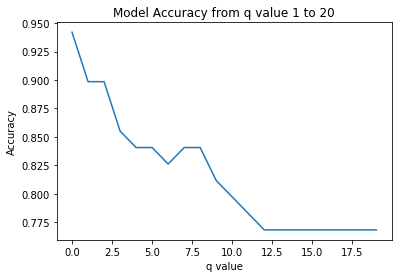

In [332]:
#ploting the graph of accuracy (for q value 1 to 20)
plt.plot(accuracy_l)
plt.title("Model Accuracy from q value 1 to 20")
plt.xlabel("q value")
plt.ylabel("Accuracy")
plt.show()

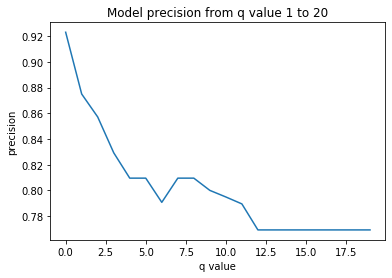

In [333]:
#ploting the graph of precision (for q value 1 to 20)
plt.plot(precision_l)
plt.title("Model precision from q value 1 to 20")
plt.xlabel("q value")
plt.ylabel("precision")
plt.show()

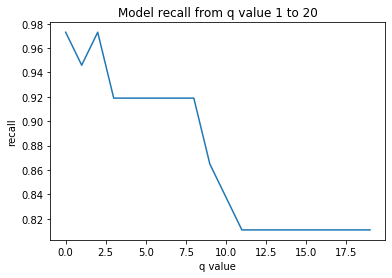

In [335]:
#ploting the graph of recall (for q value 1 to 20)
plt.plot(recall_l)
plt.title("Model recall from q value 1 to 20")
plt.xlabel("q value")
plt.ylabel("recall")
plt.show()

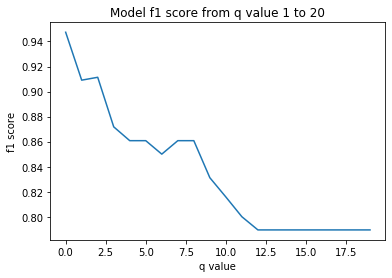

In [334]:
#ploting the graph of f1 score (for q value 1 to 20)
plt.plot(f1_l)
plt.title("Model f1 score from q value 1 to 20")
plt.xlabel("q value")
plt.ylabel("f1 score")
plt.show()

## Here we have calculated the Minkowski distance for each row in test set with respect to our training dataset. At first we have computed the accuracy, precision, recall and f1 score for the Manhattan distance and then for the Euclidian distance.

## Then in the second half of this file, we have written one function which will calculate the distance for q value 1 to 20, and computed the accuracy, precision, recall and f1 score for a value. so according to the graphs ploted above we can conclude that the best q value is 1 to get the maximum accuracy, precision, recall and f1 score, i.e 0.942, 0.923, 0.972, 0.947 respectively